In [45]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [96]:
def bitree(n):
    h = np.power(2., -n);
    nl = 1;
    for i in range(n):
        nl *= 2
    tree =  0.5*h + h*np.linspace(0, nl, nl, endpoint=False)
    return tree

In [97]:
def fx(x):
    return np.exp(-32*(0.5-x)**2)

In [112]:
def restriction(fxl):
    #restricts or averages from l to l-1
    _fx = []
    for i in range(len(fxl)):
        if (i%2 == 1):
            val = 0.5*(fxl[i-1] + fxl[i]); 
            _fx.append(val);
    return _fx;

#Apply ghost
nghost = 2;
def boundary(x, fx):
    #symmetric boundary for fx at x=0, x=1
    xb = []
    fxb =[]
    l = len(x)
    for i_ in range(nghost):
        i = nghost-i_-1;
        xb.append(-x[i])
        fxb.append(fx[i])
    for i in range(l):
        xb.append(x[i])
        fxb.append(fx[i])
    for i_ in range(nghost):
        i = (l-nghost)-i_+1
        xb.append(2. - x[i])
        fxb.append(fx[i])
    return xb,fxb

def prolongation(xl_1, fxl_1):
    #interpolates from l-1 to l
    _x, _fx = boundary(xl_1, fxl_1);
    fxl = []
    for _i in range(len(fxl_1)):
        i = _i + nghost
        val = 0.25* _fx[i-1] + 0.75* _fx[i]
        fxl.append(val)
        val = 0.75* _fx[i] + 0.25* _fx[i+1]
        fxl.append(val)
    return fxl;

In [99]:
x4 = bitree(4)
x3 = bitree(3)
x10 = bitree(10) # ~1000 points for reference only
fx10 = fx(x10)

In [100]:
fx4 = fx(l4)
fx4

array([8.83826307e-04, 5.08606923e-03, 2.27941809e-02, 7.95595087e-02,
       2.16265167e-01, 4.57833362e-01, 7.54839602e-01, 9.69233234e-01,
       9.69233234e-01, 7.54839602e-01, 4.57833362e-01, 2.16265167e-01,
       7.95595087e-02, 2.27941809e-02, 5.08606923e-03, 8.83826307e-04])

In [101]:
#restricted to coarser level
fx3 = restriction(fx4)
fx3

[0.0029849477689738754,
 0.05117684480092002,
 0.3370492643007508,
 0.8620364182326757,
 0.8620364182326757,
 0.3370492643007508,
 0.05117684480092002,
 0.0029849477689738754]

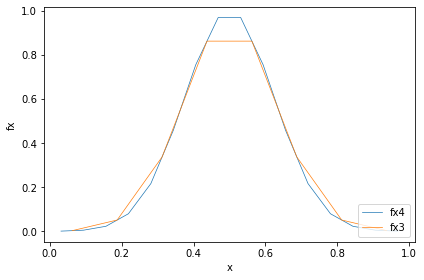

In [102]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("fx")
ax1.plot(x4, fx4, linewidth = 0.7, label = "fx4")
ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

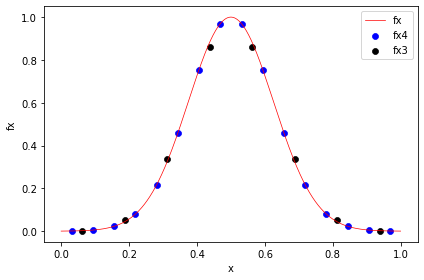

In [103]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("fx")
ax1.plot(x10, fx10, linewidth = 0.7, label = "fx", color = 'r')
#ax1.plot(x4, fx4, linewidth = 0.7, label = "fx4")
ax1.scatter(x4, fx4, linewidth = 0.7, label = "fx4", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
ax1.scatter(x3, fx3, linewidth = 0.7, label = "fx3", color = "black")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [114]:
Ifx4 = prolongation(x3, fx3)
Ifx4

[0.0029849477689738754,
 0.01503292202696041,
 0.03912887054293348,
 0.1226449496758777,
 0.2655811594257931,
 0.468296052783732,
 0.7307896297496945,
 0.8620364182326757,
 0.8620364182326757,
 0.7307896297496945,
 0.468296052783732,
 0.2655811594257931,
 0.1226449496758777,
 0.03912887054293348,
 0.01503292202696041,
 0.0029849477689738754]

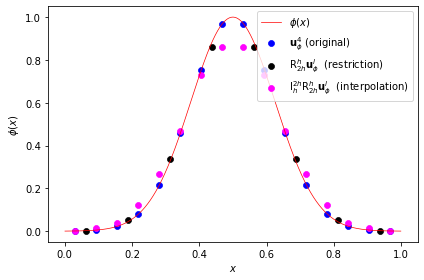

In [125]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

pl0 = ax1.plot(x10, fx10, linewidth = 0.7, label = r"$\phi(x)$", color = 'r')
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\mathbf{u}_\phi^{4}$ (original)", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \mathbf{u}_\phi^l $  (restriction)", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \mathbf{u}_\phi^l $  (interpolation)", color = "magenta")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

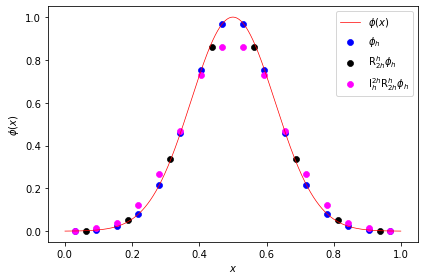

In [131]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

pl0 = ax1.plot(x10, fx10, linewidth = 0.7, label = r"$\phi(x)$", color = 'r')
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\phi_h$", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \phi_h $ ", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \phi_h $", color = "magenta")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt.png")

plt.show()

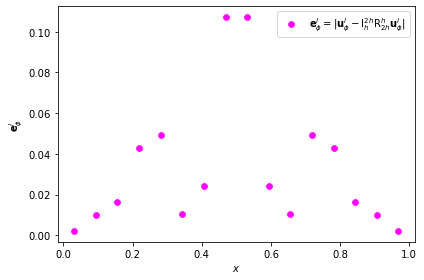

In [130]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\mathbf{e}_\phi^l$")

pl3 = ax1.scatter(x4, abs(Ifx4-fx4), linewidth = 0.7, label = r"$\mathbf{e}_\phi^l = |\mathbf{u}_\phi^l - \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \mathbf{u}_\phi^l |$", color = "magenta")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

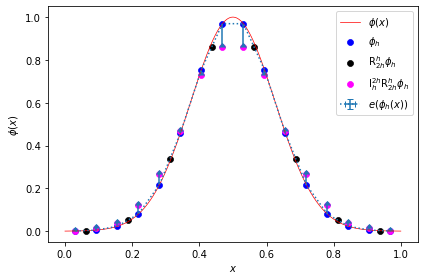

In [140]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

ax1.errorbar(x4, fx4, xerr=x4-x4, yerr=Ifx4-fx4, lolims=1, uplims=0,  linestyle='dotted', label = r"$e(\phi_h(x))$")
pl0 = ax1.plot(x10, fx10, linewidth = 0.7, label = r"$\phi(x)$", color = 'r')
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\phi_h$", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \phi_h $ ", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \phi_h $", color = "magenta")

#             lolims=lolims, uplims=uplims,

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt.png")

plt.show()

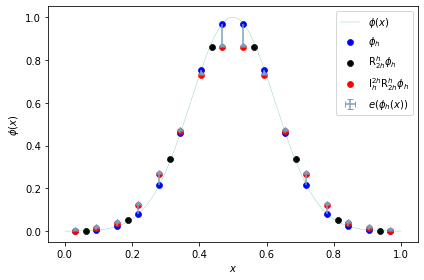

In [149]:

fig, ax1 = plt.subplots()

cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1",
        "#745ea6", "#db7e76"]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", cols)


ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

ax1.errorbar(x4, fx4, xerr=x4-x4, yerr=Ifx4-fx4, lolims=1, uplims=0, linestyle = 'None', label = r"$e(\phi_h(x))$", color = "#7aa0c4")
pl0 = ax1.plot(x10, fx10, linewidth = 0.2, label = r"$\phi(x)$", color = "#01a049")
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\phi_h$", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \phi_h $ ", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \phi_h $", color = 'r')

#             lolims=lolims, uplims=uplims,

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt.png")

plt.show()